In [1]:
using EnvelopeApproximation
using EnvelopeApproximation.BubbleBasics
using EnvelopeApproximation.BubblesIntegration
using EnvelopeApproximation.StressEnergyTensor
import LinearAlgebra: norm
import Meshes: coordinates
using Plots

Point3 = EnvelopeApproximation.Point3


Point3 (alias for Meshes.Point{3, Float64})

# Setting up the bubbles

In [2]:
d = 1.
ΔV = 1.
ηs = LinRange(0.5, 15, 100)
bubbless = bubbless = [Bubbles([Bubble(Point3(0., 0., -d / 2) , η), Bubble(Point3(0., 0., d / 2), η)]) for η in ηs]
bubbless

100-element Vector{Bubbles}:
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 0.5), Bubble(Point(0.0, 0.0, 0.5), 0.5)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 0.6464646464646465), Bubble(Point(0.0, 0.0, 0.5), 0.6464646464646465)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 0.7929292929292929), Bubble(Point(0.0, 0.0, 0.5), 0.7929292929292929)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 0.9393939393939394), Bubble(Point(0.0, 0.0, 0.5), 0.9393939393939394)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 1.0858585858585859), Bubble(Point(0.0, 0.0, 0.5), 1.0858585858585859)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 1.2323232323232323), Bubble(Point(0.0, 0.0, 0.5), 1.2323232323232323)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 1.378787878787879), Bubble(Point(0.0, 0.0, 0.5), 1.378787878787879)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 1.525252525252525), Bubble(Point(0.0, 0.0, 0.5), 1.525252525252525)])
 Bubbles(Bubble[Bubble(Point(0.0, 0.0, -0.5), 1.6717171717171

# Setting up the Ks

In [3]:
k_vecs = [Point3(0., 1., 1.)]
norm(p:: Point3) = norm(coordinates(p), 2)

norm (generic function with 23 methods)

In [4]:
k_vecs

1-element Vector{Meshes.Point3}:
 Point(0.0, 1.0, 1.0)

# Computing Numerically

In [9]:
tensor_directions = [(:x, :x), (:y, :y), (:z, :z)]
T_ij = EnvelopeApproximation.StressEnergyTensor.T_ij
numerical_T_ij = [T_ij(k_vecs, bubbles,  100, 500, ΔV) for bubbles in bubbless]

100-element Vector{Dict{Union{Symbol, Tuple{Vararg{Symbol, N}}} where N, Union{Vector{ComplexF64}, Vector{Meshes.Point3}}}}:
 Dict((:z, :z) => ComplexF64[1.1503743627215237 + 4.670539671160212e-17im], :k => Meshes.Point3[Point(0.0, 1.0, 1.0)], (:x, :z) => ComplexF64[-2.244372612427879e-18 - 1.2000127521988486e-17im], (:y, :y) => ComplexF64[1.1503758960670054 + 2.3670772061719242e-17im], :trace => ComplexF64[0.844310816619997 + 3.488081676793209e-17im], (:x, :y) => ComplexF64[-1.3044908024238515e-17 - 9.240349692060478e-17im], (:x, :x) => ComplexF64[1.16515311633627 + 3.220034791912135e-17im], (:y, :z) => ComplexF64[-0.01477736713271654 + 3.8852143976023676e-18im])
 Dict((:z, :z) => ComplexF64[2.1197161360487504 - 0.0008933036161461213im], :k => Meshes.Point3[Point(0.0, 1.0, 1.0)], (:x, :z) => ComplexF64[6.916867210893471e-6 - 5.254655821272329e-6im], (:y, :y) => ComplexF64[2.2827549429354326 - 0.0010570227654055396im], :trace => ComplexF64[1.485257414345862 + 0.00035695898167811824im],

# Z Z

In [10]:
T_xx = [d[(:x, :x)][1] for d in numerical_T_ij]  .|> real
T_yy = [d[(:y, :y)][1] for d in numerical_T_ij]  .|> real
T_zz = [d[(:z, :z)][1] for d in numerical_T_ij]  .|> real

100-element Vector{Float64}:
   1.1503743627215237
   2.1197161360487504
   3.650152607262242
   4.871093420697424
   6.172717486029016
   7.580776555328365
  10.231326328225025
  11.110612351467218
  10.865341642268529
  10.596759653646386
   ⋮
 241.08471079177139
 304.2106524334923
 374.1190420034656
 353.07491061207617
 377.03602896763465
 311.92511603612365
 374.80417597087245
 373.2284003861135
 257.1792791199993

In [11]:
T_zz

100-element Vector{Float64}:
   1.1503743627215237
   2.1197161360487504
   3.650152607262242
   4.871093420697424
   6.172717486029016
   7.580776555328365
  10.231326328225025
  11.110612351467218
  10.865341642268529
  10.596759653646386
   ⋮
 241.08471079177139
 304.2106524334923
 374.1190420034656
 353.07491061207617
 377.03602896763465
 311.92511603612365
 374.80417597087245
 373.2284003861135
 257.1792791199993

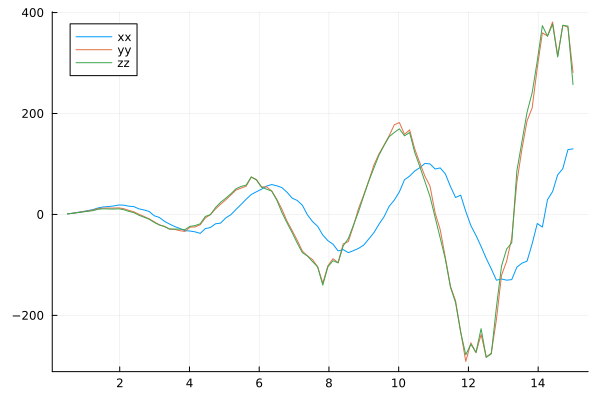

"/home/ben/.julia/dev/EnvelopeApproximation/scripts/benchmarks/comparison_to_Maya/varying_eta_constant_k.png"

In [12]:
p = plot(ηs, T_xx, label="xx")
plot!(ηs, T_yy, label="yy")
plot!(ηs, T_zz, label="zz")
display(p)
savefig("varying_eta_constant_k.png")

# Saving the data

In [13]:
import Meshes: coordinates
k = k_vecs[1] |> coordinates |> collect

3-element Vector{Float64}:
 0.0
 1.0
 1.0

In [14]:
data = Dict("eta" => ηs, "T_xx" => T_xx, "T_yy" => T_yy, "T_zz" => T_zz, 
            "d" => d, "k" => k)

Dict{String, Any} with 6 entries:
  "T_zz" => [1.15037, 2.11972, 3.65015, 4.87109, 6.17272, 7.58078, 10.2313, 11.…
  "T_xx" => [1.16515, 2.33408, 4.01783, 5.7257, 7.56143, 9.59927, 12.8459, 14.7…
  "k"    => [0.0, 1.0, 1.0]
  "eta"  => LinRange{Float64}(0.5, 15.0, 100)
  "T_yy" => [1.15038, 2.28275, 3.88321, 5.44038, 7.03663, 8.70884, 11.3434, 12.…
  "d"    => 1.0

In [15]:
using JSON

filename = "varying_eta_constant_k_data.json"

# Save the JSON string to a file
open(filename, "w") do file
    write(file, JSON.json(data))
end

println("Data saved to $filename")

Data saved to varying_eta_constant_k_data.json
